In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [3]:
# Generate synthetic data
np.random.seed(42)
n_samples = 1000

In [8]:
data = {
    'age': np.random.randint(18, 70, n_samples),
    'job': np.random.choice(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed'], n_samples),
    'marital': np.random.choice(['married', 'single', 'divorced'], n_samples),
    'education': np.random.choice(['primary', 'secondary', 'tertiary', 'unknown'], n_samples),
    'default': np.random.choice(['yes', 'no'], n_samples),
    'balance': np.random.randint(-2000, 50000, n_samples),
    'housing': np.random.choice(['yes', 'no'], n_samples),
    'loan': np.random.choice(['yes', 'no'], n_samples),
    'contact': np.random.choice(['cellular', 'telephone'], n_samples),
    'day': np.random.randint(1, 31, n_samples),
    'month': np.random.choice(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], n_samples),
    'duration': np.random.randint(0, 5000, n_samples),
    'campaign': np.random.randint(1, 10, n_samples),
    'pdays': np.random.randint(-1, 30, n_samples),
    'previous': np.random.randint(0, 10, n_samples),
    'poutcome': np.random.choice(['unknown', 'other', 'failure', 'success'], n_samples),
    'y': np.random.choice([0, 1], n_samples)
}

In [12]:
# Create DataFrame
df = pd.DataFrame(data)
print(df)
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

     age            job   marital  education default  balance housing loan  \
0     24     management    single  secondary      no    23074     yes   no   
1     22        student  divorced   tertiary      no    16802     yes   no   
2     46  self-employed   married    unknown      no    35844     yes   no   
3     25  self-employed    single    unknown      no    25322      no   no   
4     25       services    single    primary     yes    47636      no   no   
..   ...            ...       ...        ...     ...      ...     ...  ...   
995   54     management    single    primary      no     4645     yes   no   
996   37  self-employed   married    primary     yes     9895     yes  yes   
997   46  self-employed    single    primary      no    49843      no   no   
998   40      housemaid  divorced   tertiary      no    32762     yes   no   
999   64     unemployed   married    primary     yes    45634      no  yes   

       contact  day month  duration  campaign  pdays  previous 

In [13]:
# Define features and target variable
X = df.drop(columns=['y'])
y = df['y']

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Create and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

In [16]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [18]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.56
Precision: 0.61
Recall: 0.55
F1 Score: 0.58


In [11]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.51      0.50        97
           1       0.52      0.50      0.51       103

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.51       200



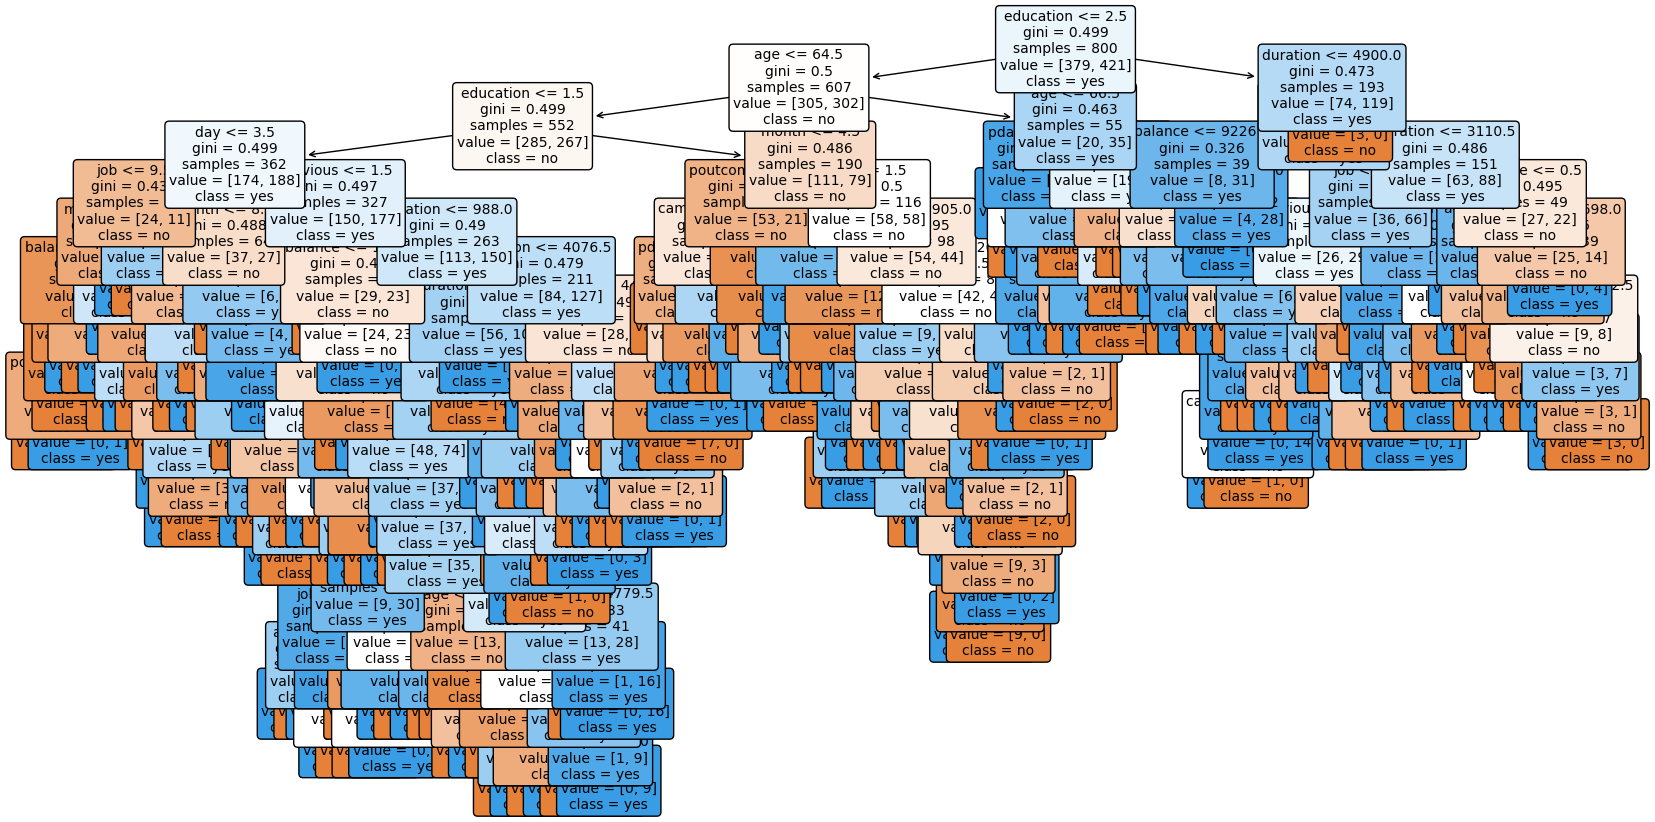

In [9]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=list(X.columns), class_names=['no', 'yes'], rounded=True, fontsize=10)
plt.show()